In [10]:
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Base de datos: Resultados por Contenido

En este DF vamos a ver por cada linea un contenido con sus KPIs reales logradas.

In [11]:
path_file2 = "data/Base de datos Argentina  (1).xlsx"
data_resultados = pd.read_excel(path_file2)

In [12]:
data_resultados.head()

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Imp/alc,ER,Reach/foll,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.0,1.2,NaN,0.280000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.0,1.2,0.035,0.210000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.0,1.03,NaN,0.097500,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.0,1.03,NaN,0.099691,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.0,1.03,NaN,0.104846,Instagram,ALA,SOU,2021-07-01 00:00:00


Las columnas de reach/foll, Imp/alc y ER podemos eliminarlas y calcularlas desde python para asegurarnos que no existan errores. Por lo cual vamos a eliminarlas y volver a agregarlas

In [13]:
data_resultados = data_resultados.drop(['Reach/foll','Imp/alc','ER'], axis=1)
data_resultados

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
13124,merydelcerrok,2600000,Story Foto,158664,19798.0,4.033,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13125,merydelcerrok,2600000,Story Foto,166656,198156.0,1.294,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13126,merydelcerrok,2600000,Story Foto,105563,127547.0,3.921,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13127,merydelcerrok,2600000,Story Foto,154646,194407.0,4.850,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00


In [14]:
data_resultados["reach/foll"] = data_resultados['Alcance']/data_resultados['Followers']

In [15]:
data_resultados['Imp/Alc'] = data_resultados['Impresiones'] / data_resultados['Alcance']

In [16]:
data_resultados['ER'] = data_resultados['Interacciones'] / data_resultados['Impresiones']

Para analizar si las columnsa se agregaron y si los datos de ER son los correctos

In [17]:
data_resultados.nlargest(3, 'ER')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
248,cocinaglutenfree.ok,16300,Story Foto,1042,1411.0,2744.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.063926,1.354127,1.944720
5515,mariel_percossi,74600,Post Foto,4487,5026.0,6542.0,Instagram,Dove,D Red Wave 1,2020-01-12 00:00:00,0.060147,1.120125,1.301632
249,cocinaglutenfree.ok,16300,Story Foto,911,1166.0,1217.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.055890,1.279912,1.043739


En este caso contar con ER mayores a 1 es un caso extraño. Por lo cual vamos a analizar las columnas

In [18]:
data_resultados.describe()

,Followers,Alcance,Impresiones,Interacciones,reach/foll,Imp/Alc,ER
count,1.312900e+04,1.312900e+04,1.312800e+04,1.275700e+04,1.312900e+04,1.312800e+04,12756.000000
mean,4.201421e+05,2.626051e+10,6.621820e+04,2.135143e+03,2.254945e+05,1.574913e+00,0.017549
std,6.851198e+05,2.185055e+12,2.854645e+05,2.277314e+04,1.829109e+07,1.128001e+01,0.045844
min,1.837000e+03,9.600000e+01,1.190000e+02,0.000000e+00,3.692308e-05,1.150000e-10,0.000000
25%,5.500000e+04,4.233000e+03,4.674250e+03,1.100000e+01,4.783784e-02,1.020000e+00,0.001071
50%,1.310000e+05,1.116000e+04,1.224800e+04,4.500000e+01,8.764228e-02,1.080992e+00,0.003403
75%,4.350000e+05,3.792600e+04,4.288750e+04,2.210000e+02,1.619576e-01,1.154039e+00,0.014501
max,5.800000e+06,2.127217e+14,1.210862e+07,1.632528e+06,1.552713e+09,1.080552e+03,1.944720


Aca podemos notar que el 75% llega a 0.01 de ER y el maximo esta en 1.94 por lo cual podemos creer que hay registros mal cargados. Para eso utilizaremos un boxplot

Con este grafico podemos visualizar que existen datos "normales" hasta un ER de 0,04. Conociendo a la industria tiene logica, por lo cual vamos a filtar los datos que tengan un ER mayor a 0,4

In [20]:
filtro_ER = data_resultados['ER'] <= 0.4
data_resultados = data_resultados[filtro_ER]

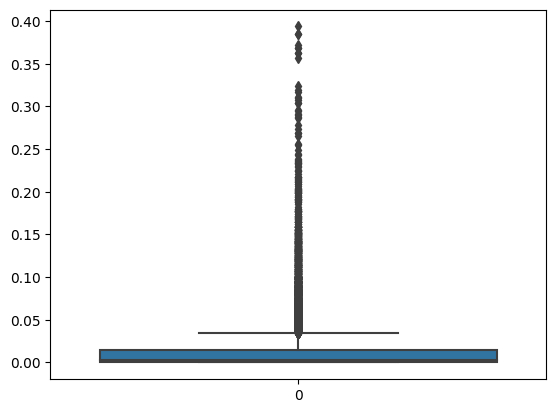

In [21]:
sns.boxplot(data_resultados['ER']);

Ahora vamos a analizar la variable Alcance

In [22]:
data_resultados.nlargest(3, 'Alcance')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
9600,laufgallego YT,137000,Post Foto,212721739130435,24463.0,2162.0,Youtube,STP,NaN,2021-05-25 00:00:00,1.552713e+09,1.150000e-10,0.088378
10716,me.johansen,93800,Post Foto,132051785714286,147898.0,11890.0,Instagram,STP,NaN,2021-05-31 00:00:00,1.407802e+09,1.120000e-09,0.080393
9990,ailutokman TK,1600000,Post Foto,8956521,10300000.0,1632528.0,TikTok,Hellmann's,Ketchup,2022-06-01 00:00:00,5.597826e+00,1.150000e+00,0.158498


En este caso podemos notar que la relacion alcance no tiene sentido. Porque dice que alcanzo mas personas con una cantida muy pequeña de impresiones. Por lo cual estos dos datos son erroreos y debemos elimarlos.

In [23]:
filtro_alcance = data_resultados['Alcance'] <= 8956521
data_resultados = data_resultados[filtro_alcance]

In [24]:
data_resultados.nlargest(3, 'Alcance')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
9990,ailutokman TK,1600000,Post Foto,8956521,10300000.0,1632528.0,TikTok,Hellmann's,Ketchup,2022-06-01 00:00:00,5.597826,1.15,0.158498
9454,kulinaria.recetas TK,3300000,Post Foto,5739130,6600000.0,1001527.0,TikTok,Cif,Climbing,2022-05-01 00:00:00,1.739130,1.15,0.151747
9450,kulinaria.recetas TK,2000000,Post Foto,5500000,6600000.0,879815.0,Tiktok,Cif,Climbing,Feb-Mar 2022,2.750000,1.20,0.133305


Lo sigueinte que haremos es analizar con que marcas trabaja la agencia ZZZ en Argentina

In [25]:
data_resultados['Marca'].str.lower().unique()

array(['ala', 'eucerin', 'sedal', 'vivere', 'skip', 'amex', 'dove',
       'klorane', '???', 'clight', 'dkny', 'rexona', 'ath', 'cif',
       'baby dove', 'pierre fabre', 'puig', 'maizena', 'energizer',
       'cabify', 'tommy', 'amex\xa0', 'milkaut', 'coderhouse', 'ufs',
       'bagó', 'aperol', 'dermaglós', 'nivea', 'savora', 'ank',
       'cencosud', 'naranja x', 'tang', 'unilever', 'adler', 'knorr',
       'gps farma', 'gum', 'skip ', 'armorall', 'disco', "hellmann's",
       'jumbo argentina', 'drogueria del sud', 'twdc', 'bagovit', 'stp',
       'rexona ', 'estee lauder', 'savencia', 'tresemmé', 'mercado libre'],
      dtype=object)

En este caso queremos saber cuanto contenido es en Posteo y cuanto en Story

In [26]:
tipo_contenido = data_resultados[['Servicio', ' Account']].groupby('Servicio').count()
tipo_contenido

,Account
Servicio,
Post Foto,1961
Story Foto,10777


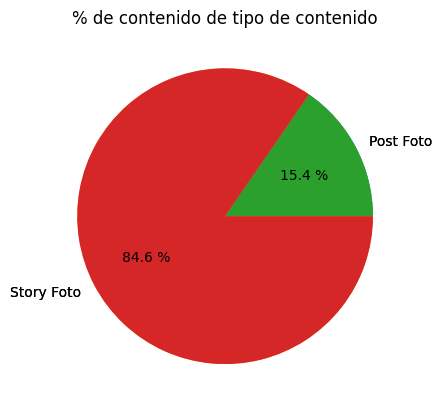

In [27]:
tipo_de_servio = ['Post Foto', 'Story Foto']
cantidad_por_servicio = [1961, 10777]
plt.pie(cantidad_por_servicio, labels=tipo_de_servio)
plt.title("% de contenido de tipo de contenido")
plt.pie(cantidad_por_servicio, labels=tipo_de_servio, autopct="%0.1f %%")
plt.show()

Y aca por plataforma:

In [28]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
Facebook,3
Instagram,12657
TikTok,60
Tiktok,14
YouTube,3
Youtube,1


Pero como hay plataformas con distinta nomenclatura vamos a pasar todas a minuscula

In [29]:
data_resultados['Plataforma'] = data_resultados['Plataforma'].str.lower()

In [30]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
facebook,3
instagram,12657
tiktok,74
youtube,4


## Modelo Regresion Lineal
La hipotesis para este trabajo es que el alcance que consigue un contenido esta relacionado con la cantidad de followers que tiene el creador de contenido. Pero para eso vamos a analizar las diversas correlaciones entre las variables. Pero para podeer realizar este trabajo algunas columnas debemos estandarizar a traves de encoding

In [31]:
numericas = data_resultados.select_dtypes(exclude=['object']).columns
numericas

Index(['Followers', 'Alcance', 'Impresiones', 'Interacciones', 'reach/foll',
       'Imp/Alc', 'ER'],
      dtype='object')

En estos casos podemos ver que contamos con datos outliers y la distribucion no se distingue muy bien. Por lo cual vamos a utilizar el escalado robusto para normalizar los datos.

En primer lugar, contamos con una variable categoria que debemos convertirla a numerica. Esto lo realizaremos con encoding. En este caso como son dos variables unicamente es mas sencillo de realizar a traves de codigo

In [33]:
print(f"Los valores unicos de Aspiration son {data_resultados.Servicio.unique()}")

Los valores unicos de Aspiration son ['Post Foto' 'Story Foto']


In [34]:
def contenido(x):
    if x =="Story Foto":
        return 1
    elif x == "Post Foto":
        return 0
    else:
        return 'error'

data_resultados["tipo_contenido"] = data_resultados["Servicio"].apply(contenido)

In [35]:
data_resultados.head()

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER,tipo_contenido
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.0,instagram,Ala,Sou,Feb - Mar 2022,0.279482,1.200065,0.056449,0
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.0,instagram,Eucerin,Curitas,2022-06-01 00:00:00,0.212303,1.199971,0.035209,0
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.097500,1.026907,0.015413,1
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.099691,1.025697,0.015092,1
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.0,instagram,ALA,SOU,2021-07-01 00:00:00,0.104846,1.033559,0.014241,1


## Modelo Regresion Lineal

Como dijimos anteriormente creemos que el alcance se explica por la cantidad de followers que tiene un perfil. Tambien esperamos que alcance e impresiones tengan una relacion fuerte. Porque estas dos metricas son muy similares salvo excepciones
Por otro lado, algunas columnas van a tener que mucha relacion entre si, porque estan calculadas a partir de alcance e impresiones

In [36]:
import seaborn as sns

/var/folders/wc/9rg8g9gx0ns94q3_b9h1yp1w0000gn/T/ipykernel_6355/2416187827.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_resultados.corr(),


<AxesSubplot: >

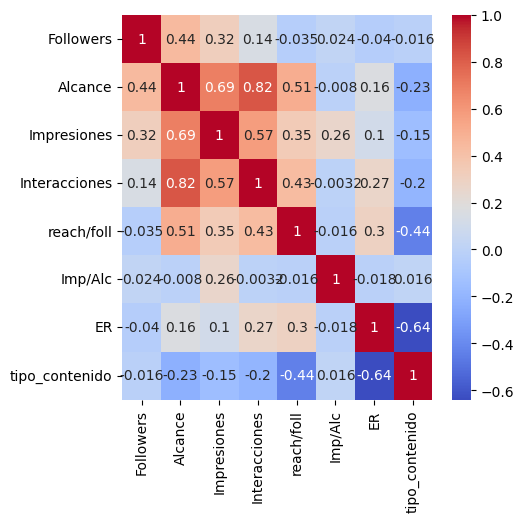

In [37]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    data_resultados.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

Otra manera de ver lo mismo es:

In [38]:
round(data_resultados.corr(),2)

/var/folders/wc/9rg8g9gx0ns94q3_b9h1yp1w0000gn/T/ipykernel_6355/1020860612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(data_resultados.corr(),2)


,Followers,Alcance,Impresiones,Interacciones,reach/foll,Imp/Alc,ER,tipo_contenido
Followers,1.00,0.44,0.32,0.14,-0.03,0.02,-0.04,-0.02
Alcance,0.44,1.00,0.69,0.82,0.51,-0.01,0.16,-0.23
Impresiones,0.32,0.69,1.00,0.57,0.35,0.26,0.10,-0.15
Interacciones,0.14,0.82,0.57,1.00,0.43,-0.00,0.27,-0.20
reach/foll,-0.03,0.51,0.35,0.43,1.00,-0.02,0.30,-0.44
Imp/Alc,0.02,-0.01,0.26,-0.00,-0.02,1.00,-0.02,0.02
ER,-0.04,0.16,0.10,0.27,0.30,-0.02,1.00,-0.64
tipo_contenido,-0.02,-0.23,-0.15,-0.20,-0.44,0.02,-0.64,1.00


Es sorprendente notar que la hipotesis a primer vista se cumple, pero que hay otras correlaciones mas fuertes que la planteada al inicio . Por ejemplo la relacion de Alcance e Impresiones es muy cercana a 1 lo cual tiene sentido porque son dos indicadores que van muy atados uno al otro. Pero en el caso de Alcance con Interacciones es sorprende porque no era consiente de esa relacion.

Para la agencia ZZZ este insight es muy interesante, porque al momento de contratar a un influencers con el que no se trabajo se podria predecir cuanto es el alcance. Esto se debe a que las metricas de alcance e impresiones son privadas en la mayoria de las plataformas, pero la mayoria de las interacciones si son publicas. Entonces para esta agencia, sabiendo las interacciones del perfil podria estimar cuanto es el alcance y determinar si le sirve o no para las diversas campañas de marketing

Por lo cual en este grafico vamos a visualizar la relacion de todos nuestros datos entre el alcance y las interacciones

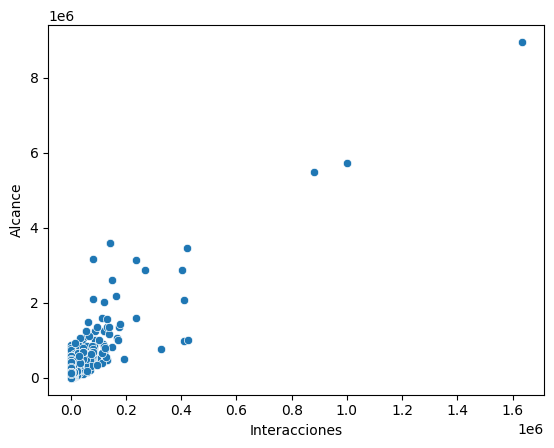

In [40]:
sns.scatterplot(x='Interacciones', y='Alcance', data=data_resultados);

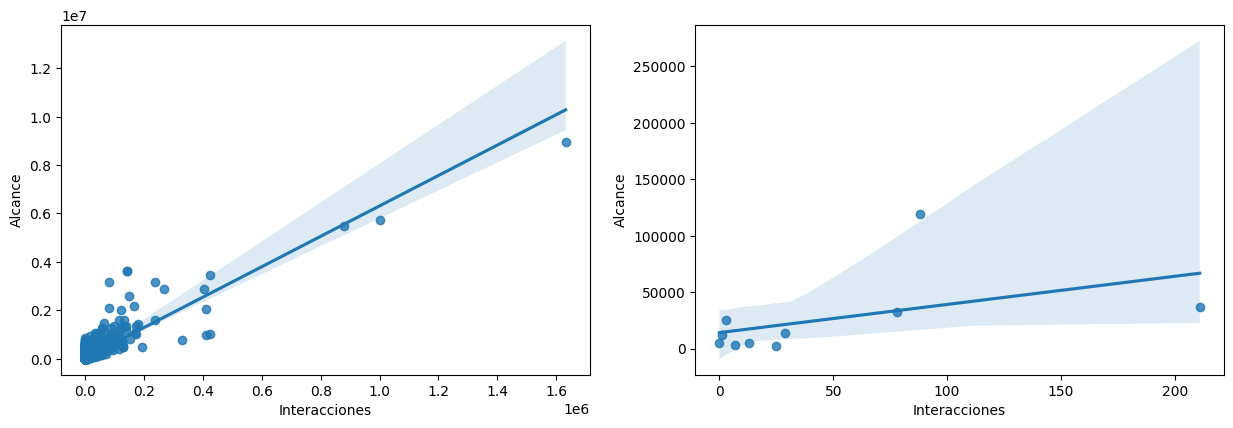

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='Interacciones', y='Alcance', data=data_resultados, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='Interacciones', y='Alcance', data=data_resultados.sample(10, random_state=3), ci=95);

Y ahora pasaremos a realizar el modelo. Donde buscaremos explicar el alcance a traves de la cantidad de interacciones que tiene un contenido

In [43]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Alcance ~ Interacciones', data=data_resultados)

# Train the model to find best line
model = model.fit()
model

In [44]:
print(model.params)

Intercept        39065.803289
Interacciones        6.272679
dtype: float64


Los parametros que nos devuelve significna lo sigueinte:
- La interpcept es lo normalmente conocido como ordenada de origen, o sea que cuando tengamos 0 interacciones, el alcance sera 0.79.
- Interacciones: es la pendiente. Esto quiere decir que a medida que aumente una interaccion, el alcance crecera un 0.03

In [45]:
print('R-cuadrado = ', (data_resultados.corr()['Alcance']['Interacciones'])**2)

R-cuadrado =  0.6748107123660264


/var/folders/wc/9rg8g9gx0ns94q3_b9h1yp1w0000gn/T/ipykernel_6355/1395753131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('R-cuadrado = ', (data_resultados.corr()['Alcance']['Interacciones'])**2)


Otra manera de ver lo mismo:

In [46]:
model.rsquared

0.6748107123660361

El R2 es el coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. En otras palabras es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. Este valor puede ir de 0 a 1 (aunque existan casos negativos), en este caso al estar cercano a 1 podemos decir que el objetivo se explica bastante bien por las caracteristicas de las interacciones

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcance   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 2.643e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:41:04   Log-Likelihood:            -1.6462e+05
No. Observations:               12738   AIC:                         3.293e+05
Df Residuals:                   12736   BIC:                         3.293e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.907e+04    882.793     44.253      0.000    3.73e+04    4.08e+04
Interacciones     6.2727      0.039    162.570      0.000       6.197       6.348
==============================================================================
Omnibus:                    16967.488   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15283041.239
Skew:                           6.996   Prob(JB):                         0.00
Kurtosis:                     172.114   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
n=390
residuals = model.predict(data_resultados['Interacciones']) - data_resultados['Alcance']
residuals.std()/data_resultados.Impresiones.std() * 1/(n**0.5)

0.017359050592039647

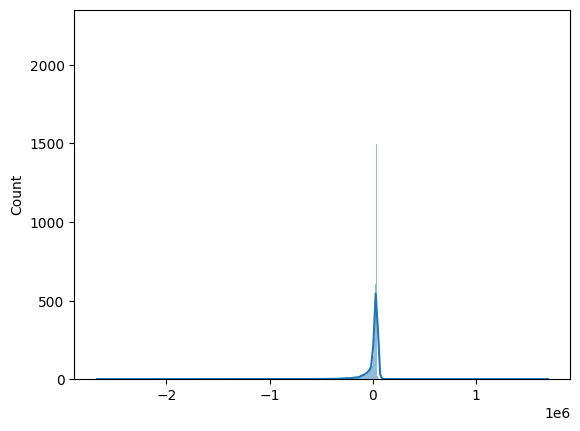

In [49]:
sns.histplot(residuals, kde=True, edgecolor='w');

In [50]:
predicted_interacciones = model.predict(data_resultados['Interacciones'])
predicted_interacciones

0        42961.137021
1        40922.516308
2        39379.437245
3        39379.437245
4        39379.437245
             ...     
13124    39091.101004
13125    39073.920136
13126    39090.398464
13127    39096.225783
13128    39077.802924
Length: 12738, dtype: float64

En este caso lo que esta haciendo es calcular los residuos que tenemos por registro

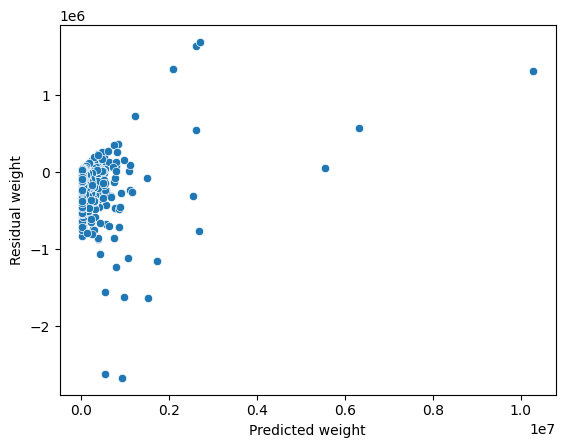

In [51]:
sns.scatterplot(x=predicted_interacciones, y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight');

Ahora lo que buscaremos es aplicar este modelo a alguna instancia que no exista en nuestra base. Para eso seleccionaremos dos post de las redes sociales para calcular su alcance a traves de las metricas de interacciones.
- SofiSantos TK: https://www.tiktok.com/@sofisantosok/video/7170549560731782405?is_copy_url=1&is_from_webapp=v1
    - Cuenta con 108500 likes, 237 comments, 2980 guardados y 227 enviados

In [52]:
sofi_santos_interacciones = 108500+237+2980+227

In [53]:
ordenada_de_origen = model.params[0]
pendiente = model.params[1]

In [54]:
def estimacion_alcance (x):
    print(ordenada_de_origen+pendiente*x)

In [55]:
estimacion_alcance(sofi_santos_interacciones)

741254.5943610527


In [56]:
luisito_comunica_interacciones = 741795 + 10700

In [57]:
estimacion_alcance(luisito_comunica_interacciones)

4759225.475427245
